In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 10,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    shear_range = 5,
    zoom_range = [0.7, 1.3],
    validation_split = 0.2
)

data_gen_entrenamiento = datagen.flow_from_directory("../dataset",
                                                     target_size=(224, 224),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     subset="training")

data_gen_pruebas = datagen.flow_from_directory("../dataset",
                                                     target_size=(224, 224),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     subset="validation")





Found 443 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


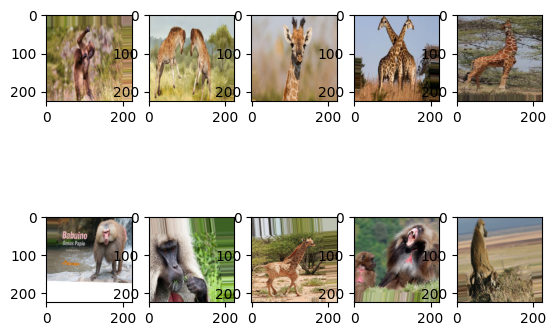

In [14]:
import matplotlib.pyplot as plt

for imagenes, etiqueta in data_gen_entrenamiento:
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(imagenes[i])
    
    break

plt.show()

In [15]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

mobilenetv2 = hub.KerasLayer(url, input_shape=(224, 224,3))


TroubleShooting
si recibo error:
urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)

ejecuto lo siguiente:

/Applications/Python\ 3.611.9/Install\ Certificates.command
https://stackoverflow.com/questions/46858630/python-ssl-certification-problems-in-tensorflow?rq=4

In [16]:
#importante
#congelar las capas
#porque el modelo ya esta entrenado
mobilenetv2.trainable = False


In [23]:
import tf_keras as keras

Troubleshooting
Si aparece error:
Only instances of `keras.Layer` can be added to a Sequential model
importar:
import tf_keras as keras 

In [27]:
modelo = keras.Sequential([
    mobilenetv2,
    keras.layers.Dense(2, activation="softmax")
])

In [28]:
modelo.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [29]:
EPOCAS = 20
entrenamiento = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

NameError: name 'data_gen_pruebas' is not defined